## Importing Libraries and training dataset


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
train_dataset=pd.read_csv(r'../input/mobile-price-classification/train.csv')
pd.set_option('max_columns',None)

In [3]:
train=train_dataset.copy()
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## EDA on training data

In [4]:
train.shape

(2000, 21)

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [8]:
train.isna().sum().any()

False

In [9]:
# checking if data is inbalanced 
train.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## Plotting features of training data

In [10]:
low_cardinality_cols=[col for col in train.columns if train[col].nunique()<10]
high_cardinality_cols=[col for col in train.columns if train[col].nunique()>=10]

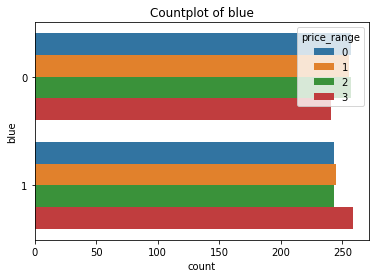

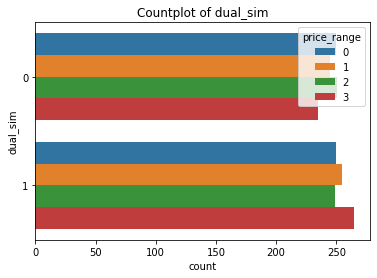

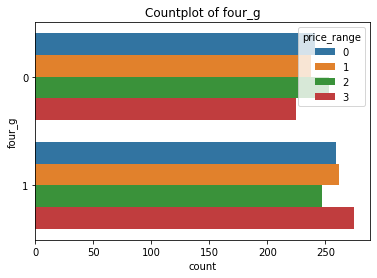

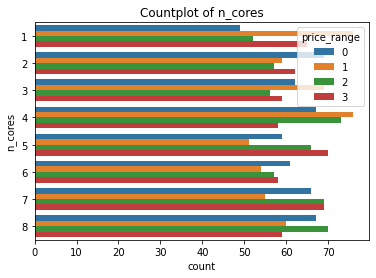

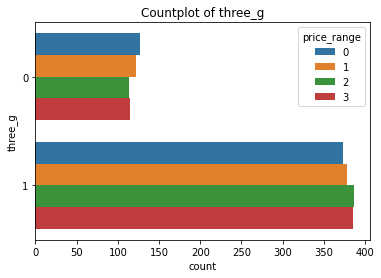

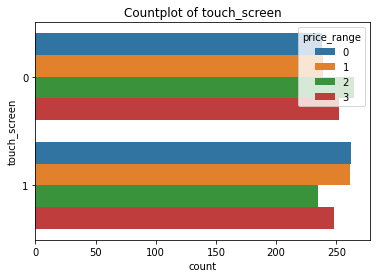

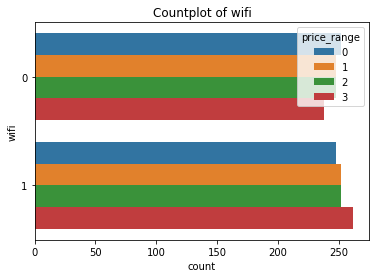

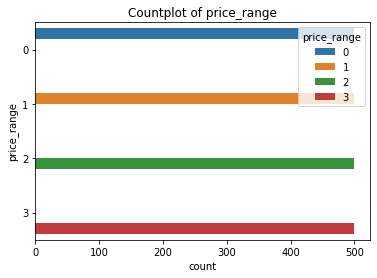

In [11]:
for feature in low_cardinality_cols:
    plt.title(f'Countplot of {feature}')
    sns.countplot(y=train[feature],hue=train.price_range)
    plt.show()

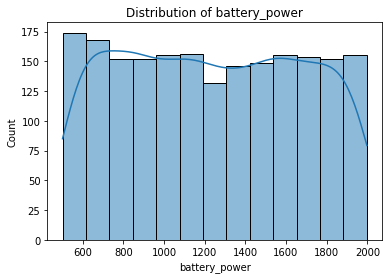

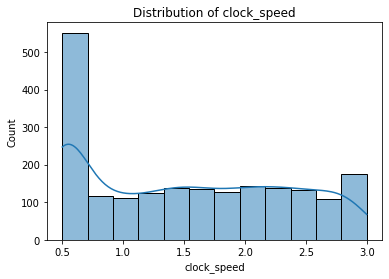

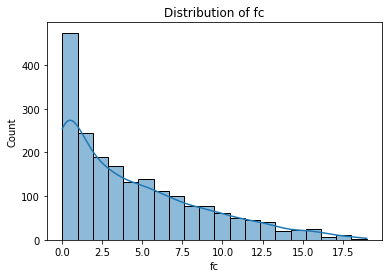

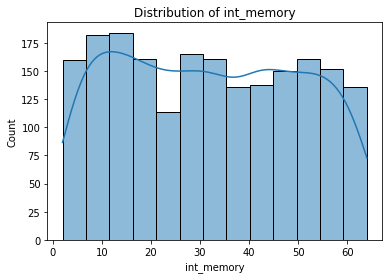

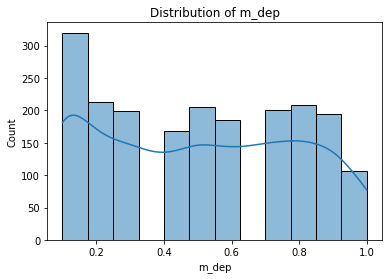

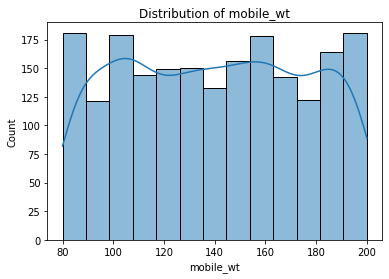

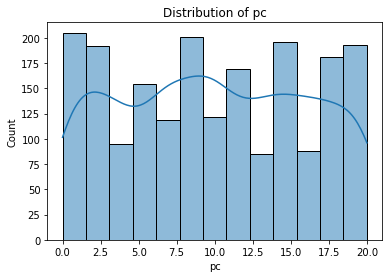

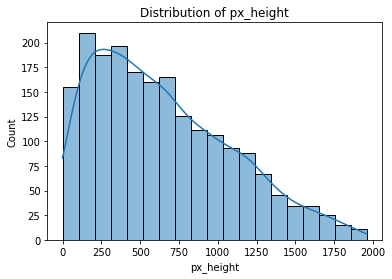

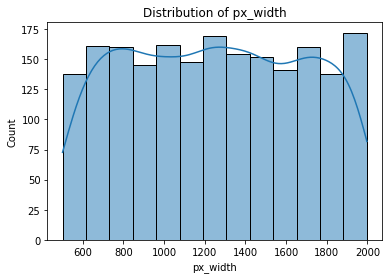

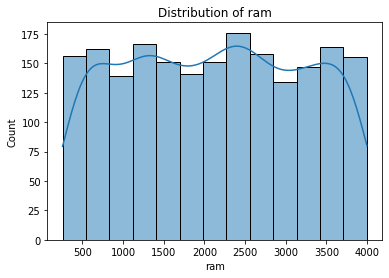

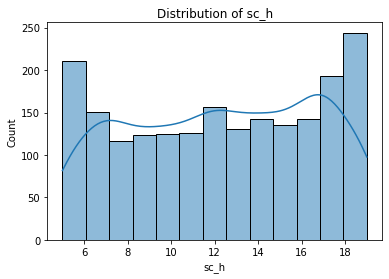

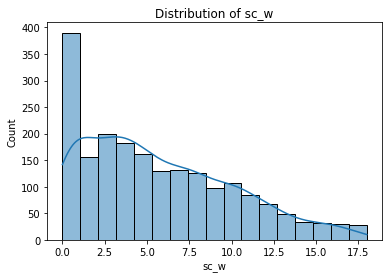

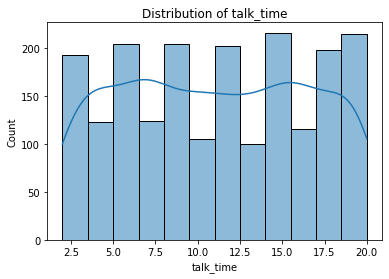

In [12]:
for feature in high_cardinality_cols:
    plt.title(f'Distribution of {feature}')
    sns.histplot(train[feature],kde=True)
    plt.show()

## Checking Correlation between features

<AxesSubplot:>

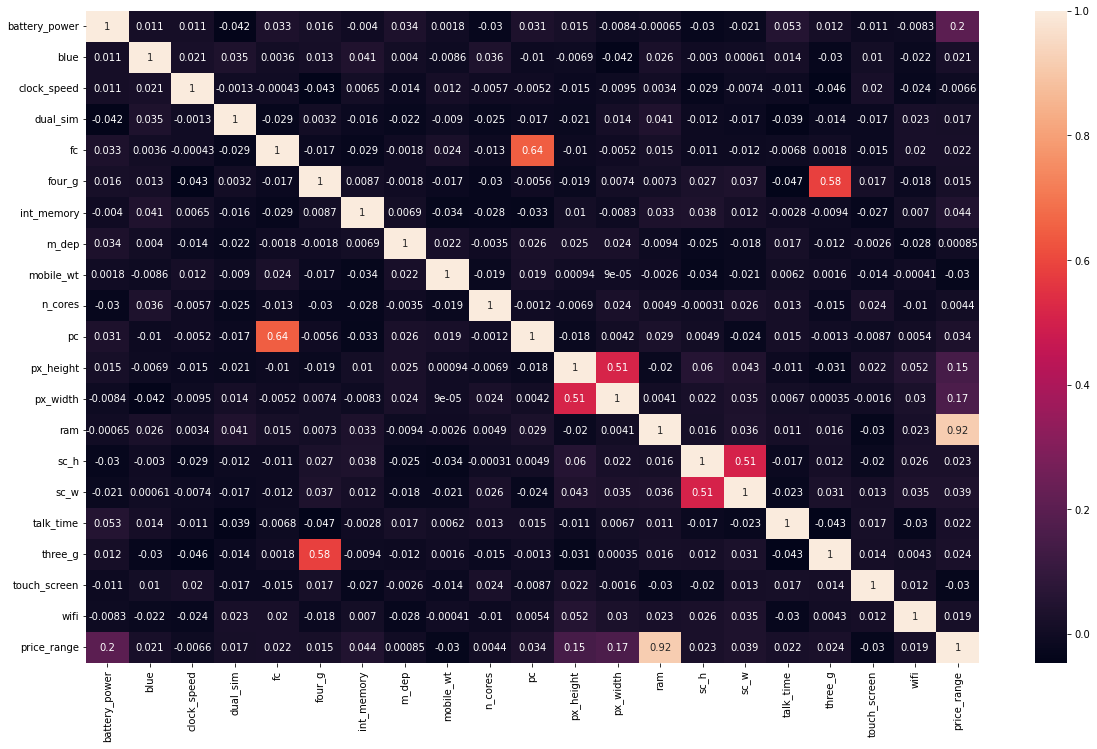

In [13]:
corr=train.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)

In [14]:
corrwith=train.corrwith(train.price_range)
corrwith

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
dtype: float64

## Train test splitting

In [15]:
target=train.price_range
train=train.drop('price_range',axis=1)

In [16]:
from sklearn.model_selection import train_test_split

train_X,val_X,train_y,val_y=train_test_split(train,target,test_size=.2,random_state=0)

## Building pipelines

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler


preprocessor = ColumnTransformer(transformers=[
    ('scaling',MinMaxScaler(),train_X.columns)
])

## Model Building and validation

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc_model=RandomForestClassifier(n_estimators=200,min_samples_leaf=6,min_samples_split=3,random_state=0,max_depth=10)

In [19]:
rfc_pipe=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('rfc_model',rfc_model)
])

In [20]:
rfc_pipe.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object'))])),
                ('rfc_model',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=6,
                                        min_samples_split=3, n_estimators=200,
                                        random_state=0))])

In [21]:
from sklearn.metrics import accuracy_score

rfc_pred=rfc_pipe.predict(val_X)

print(f'Accuracy Score RFC Pipe: {accuracy_score(rfc_pred,val_y)}')

Accuracy Score RFC Pipe: 0.8575


In [22]:
from xgboost import XGBClassifier

xgb_model=XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3,
             max_delta_step=0, max_depth=12, min_child_weight=4,
             monotone_constraints='()', n_estimators=300, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [23]:
xgb_pipe=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('xgb_model',xgb_model)
])

In [24]:
xgb_pipe.fit(train_X,train_y)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:10] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:30:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object'))])),
                ('xgb_model',
                 XGBClassifier(base_score...
                               interaction_constraints='', learning_rate=0.3,
                               max_delta_step=0, max_depth=12,
                               min_child_weight=4, missing=nan,
                               monotone_constraints='()', n_estimators=300,
                               n_jobs=-1, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,

In [25]:
xgb_pred=xgb_pipe.predict(val_X)

print(f'Accuracy Score XGB Pipe: {accuracy_score(xgb_pred,val_y)}')

Accuracy Score XGB Pipe: 0.9275


In [26]:
import lightgbm as lgb

lgb_model=lgb.LGBMClassifier(n_estimators=300,boosting='dart',num_leaves=100,max_depth=50,min_data_in_leaf=25,
                            num_threads=4,learning_rate=.35 ,random_state=0)

In [27]:
lgb_pipe=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('lgb_model',lgb_model)
])

In [28]:
lgb_pipe.fit(train_X,train_y)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object'))])),
                ('lgb_model',
                 LGBMClassifier(boosting='dart', learning_rate=0.35,
                                max_depth=50, min_data_in_leaf=25,
                                n_estimators=300, num_leaves=100, num_threads=4,
                                random_state=0))])

In [29]:
lgb_pred=lgb_pipe.predict(val_X)

print(f'Accuracy Score LGB Pipe: {accuracy_score(lgb_pred,val_y)}')

Accuracy Score LGB Pipe: 0.9275


## Plotting actual and predicted outcomes of all models**

<AxesSubplot:xlabel='count', ylabel='price_range'>

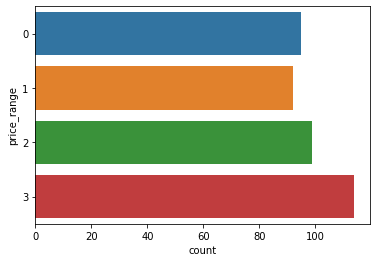

In [30]:
# Actual Outcome feature

sns.countplot(y=val_y)

<AxesSubplot:xlabel='count'>

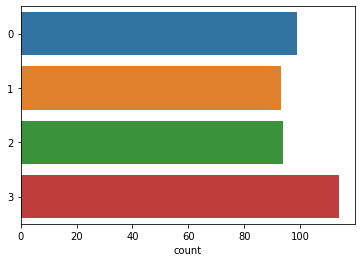

In [31]:
# Random Forest

sns.countplot(y=rfc_pred)

<AxesSubplot:xlabel='count'>

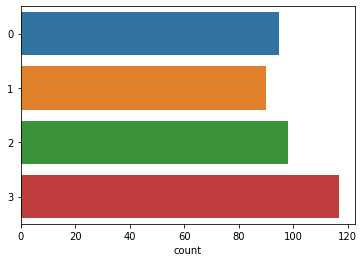

In [32]:
# xgboost

sns.countplot(y=xgb_pred)

<AxesSubplot:xlabel='count'>

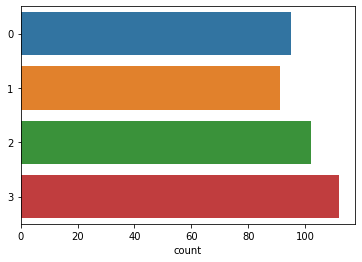

In [33]:
# Light GBM

sns.countplot(y=lgb_pred)

## Loading test data

In [34]:
test_dataset=pd.read_csv(r'../input/mobile-price-classification/test.csv')

In [35]:
test=test_dataset.copy()
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


## EDA on test data

In [36]:
test=test.drop('id',axis=1)

In [37]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0
n_cores,1000.0,4.3280,2.288155,1.0,2.00,4.0,6.00,8.0


In [38]:
test.isna().sum().any()

False

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [40]:
test.nunique()

battery_power    721
blue               2
clock_speed       26
dual_sim           2
fc                20
four_g             2
int_memory        63
m_dep             10
mobile_wt        121
n_cores            8
pc                21
px_height        694
px_width         743
ram              872
sc_h              15
sc_w              19
talk_time         19
three_g            2
touch_screen       2
wifi               2
dtype: int64

## Plotting features of test data

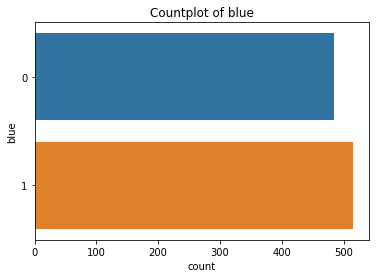

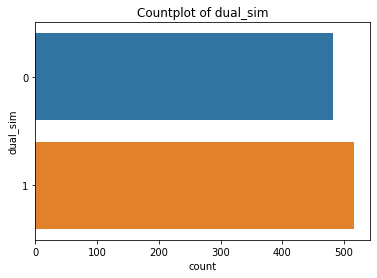

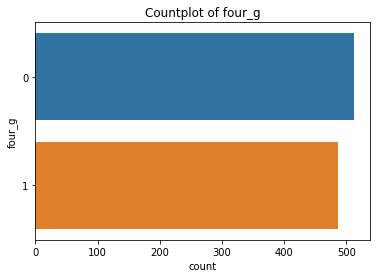

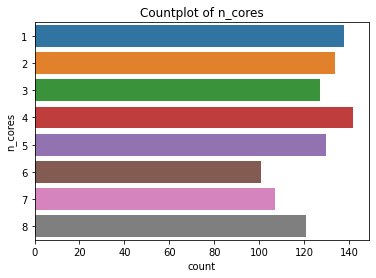

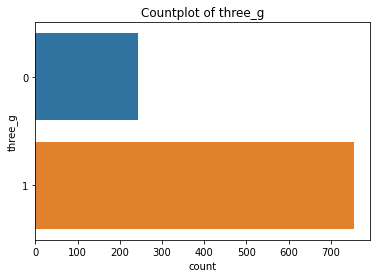

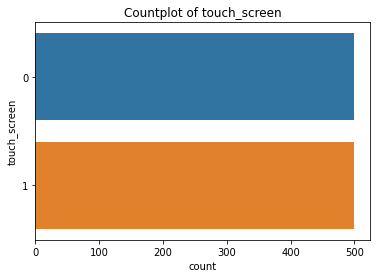

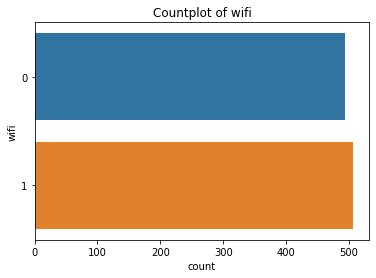

In [41]:
for col in low_cardinality_cols:
    if col!='price_range':
        plt.title(f'Countplot of {col}')
        sns.countplot(y=test[col])
        plt.show()

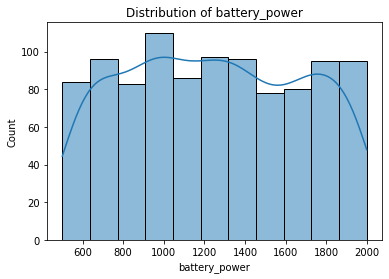

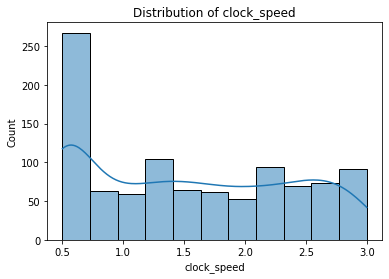

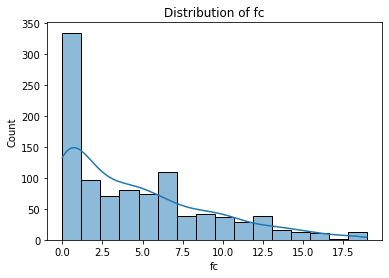

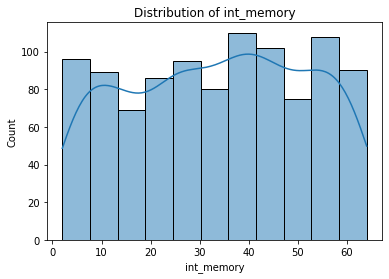

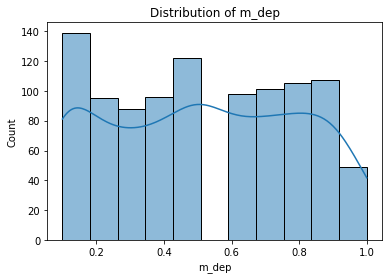

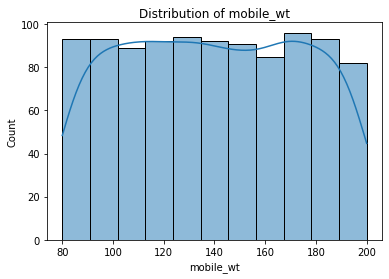

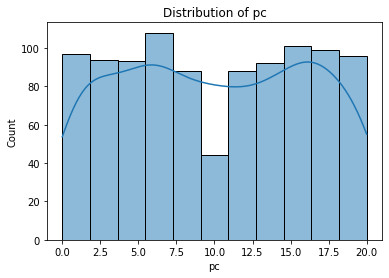

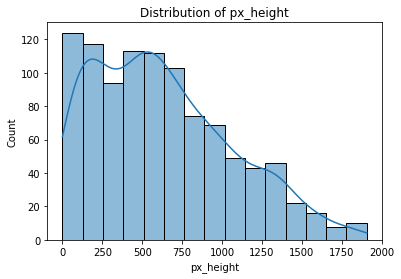

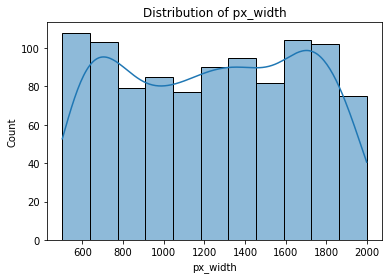

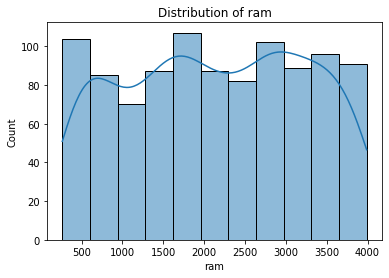

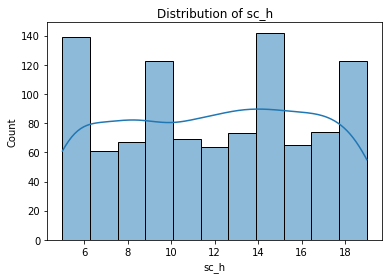

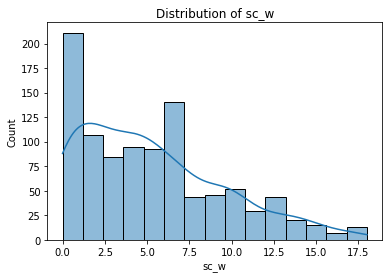

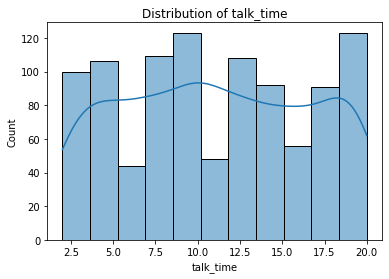

In [42]:
for col in high_cardinality_cols:
    plt.title(f'Distribution of {col}')
    sns.histplot(x=test[col],kde=True)
    plt.show()

## Model building & prediction on test data

In [43]:
lgb_pipe.fit(train,target)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object'))])),
                ('lgb_model',
                 LGBMClassifier(boosting='dart', learning_rate=0.35,
                                max_depth=50, min_data_in_leaf=25,
                                n_estimators=300, num_leaves=100, num_threads=4,
                                random_state=0))])

In [44]:
test_pred=lgb_pipe.predict(test)

## Plotting predicted price class of test data

<AxesSubplot:xlabel='count'>

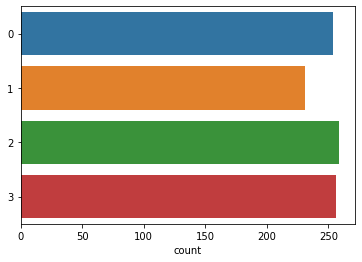

In [45]:
sns.countplot(y=test_pred)